<a href="https://colab.research.google.com/github/nikhilraghav018/Project_CaseStudies_Machine_and_Deep_Learning/blob/main/notebooks%20/%20Traffic_Sign_Classification_Using_LeNet_Network_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, we have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images.
- Classes are as listed below:

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# STEP 1: IMPORT LIBRARIES AND DATASET

In [ ]:
# import libraries
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [ ]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("/Users/nikhildharmaram/Documents/Project_Casestudies_Machine_and_Deep_Learning/data/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/Users/nikhildharmaram/Documents/Project_Casestudies_Machine_and_Deep_Learning/data/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/Users/nikhildharmaram/Documents/Project_Casestudies_Machine_and_Deep_Learning/data/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

/var/folders/nk/vmyl9sm5305121hls__s41nr0000gn/T/ipykernel_46339/475325754.py:3: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  train = pickle.load(training_data)
/var/folders/nk/vmyl9sm5305121hls__s41nr0000gn/T/ipykernel_46339/475325754.py:5: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  valid = pickle.load(validation_data)
/var/folders/nk/vmyl9sm5305121hls__s41nr0000gn/T/ipykernel_46339/475325754.py:7: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  test = pickle.load(testing_data)


In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_validation.shape

(4410, 32, 32, 3)

In [ ]:
y_validation.shape

(4410,)

In [ ]:
X_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

# STEP 2: IMAGE EXPLORATION

np.uint8(1)

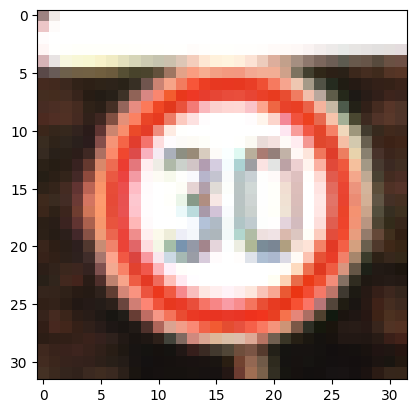

In [ ]:
i = 3000
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

np.uint8(7)

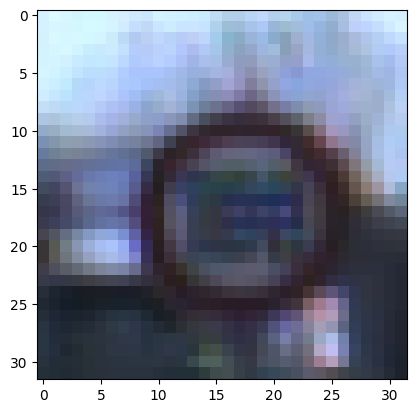

In [ ]:
i = 3000
plt.imshow(X_validation[i]) # Show images are not shuffled
y_validation[i]

np.uint8(11)

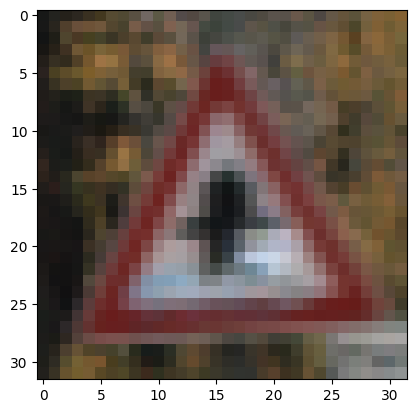

In [ ]:
i = 3000
plt.imshow(X_test[i]) # Show images are not shuffled
y_test[i]

# STEP 3: DATA PEPARATION

In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [ ]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
X_train_gray.shape, X_test_gray.shape, X_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [ ]:
X_train_gray_norm

array([[[[-0.59114583],
         [-0.5625    ],
         [-0.5546875 ],
         ...,
         [-0.58854167],
         [-0.51822917],
         [-0.62760417]],

        [[-0.59114583],
         [-0.55729167],
         [-0.54166667],
         ...,
         [-0.6328125 ],
         [-0.61979167],
         [-0.66145833]],

        [[-0.51822917],
         [-0.52864583],
         [-0.57291667],
         ...,
         [-0.63541667],
         [-0.65625   ],
         [-0.66145833]],

        ...,

        [[-0.37760417],
         [-0.42708333],
         [-0.4375    ],
         ...,
         [-0.46875   ],
         [-0.4921875 ],
         [-0.48177083]],

        [[-0.34375   ],
         [-0.43229167],
         [-0.453125  ],
         ...,
         [-0.48697917],
         [-0.51041667],
         [-0.47395833]],

        [[-0.14583333],
         [-0.43489583],
         [-0.5       ],
         ...,
         [-0.48177083],
         [-0.50520833],
         [-0.48958333]]],


       [[[ 0.77604167],


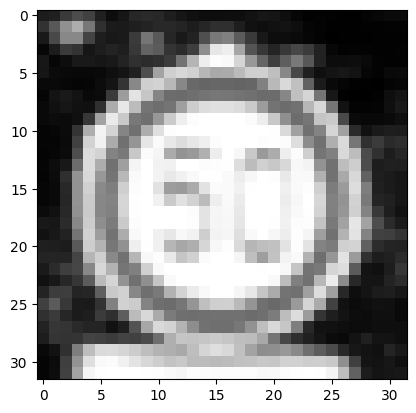

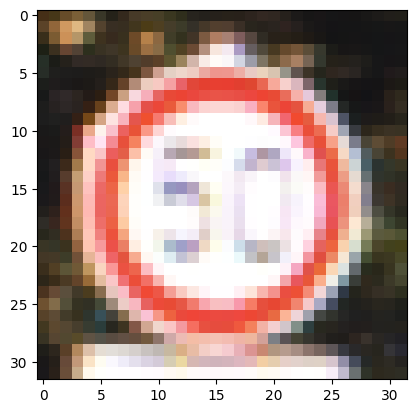

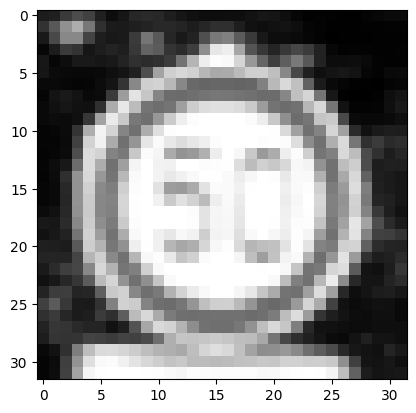

In [ ]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')


# STEP 4: MODEL TRAINING

The model consists of the following layers:

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [ ]:
#image_shape = X_train_gray[i].shape

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [ ]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.1898 - loss: 3.1196 - val_accuracy: 0.3141 - val_loss: 2.5431
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.5498 - loss: 1.6071 - val_accuracy: 0.6016 - val_loss: 1.4391
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.7289 - loss: 0.9689 - val_accuracy: 0.7005 - val_loss: 1.0068
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.8096 - loss: 0.6996 - val_accuracy: 0.7392 - val_loss: 0.8606
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.8502 - loss: 0.5557 - val_accuracy: 0.7805 - val_loss: 0.7490
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.8755 - loss: 0.4656 - val_accuracy: 0.7937 - val_loss: 0.7176
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.8948 - loss: 0.3931 - val_accuracy: 0.8181 - val_loss: 0.6441
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9099 - loss: 0.3444 - val_accu

# STEP 5: MODEL EVALUATION

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {}'.format(score[1]))

Test Accuracy : 0.8585115075111389


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

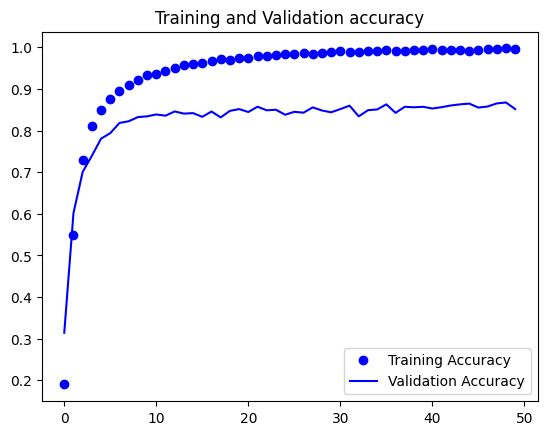

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


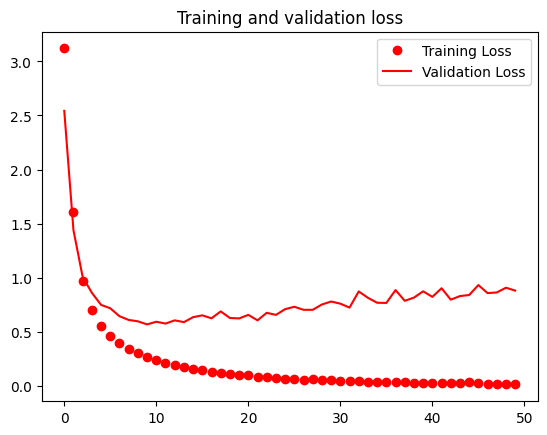

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 1. Get the probabilities for all 43 classes
probabilities = cnn_model.predict(X_test_gray_norm)

# 2. Get the index of the highest probability for each image
predicted_classes = np.argmax(probabilities, axis=1)

# 3. Store your true labels
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


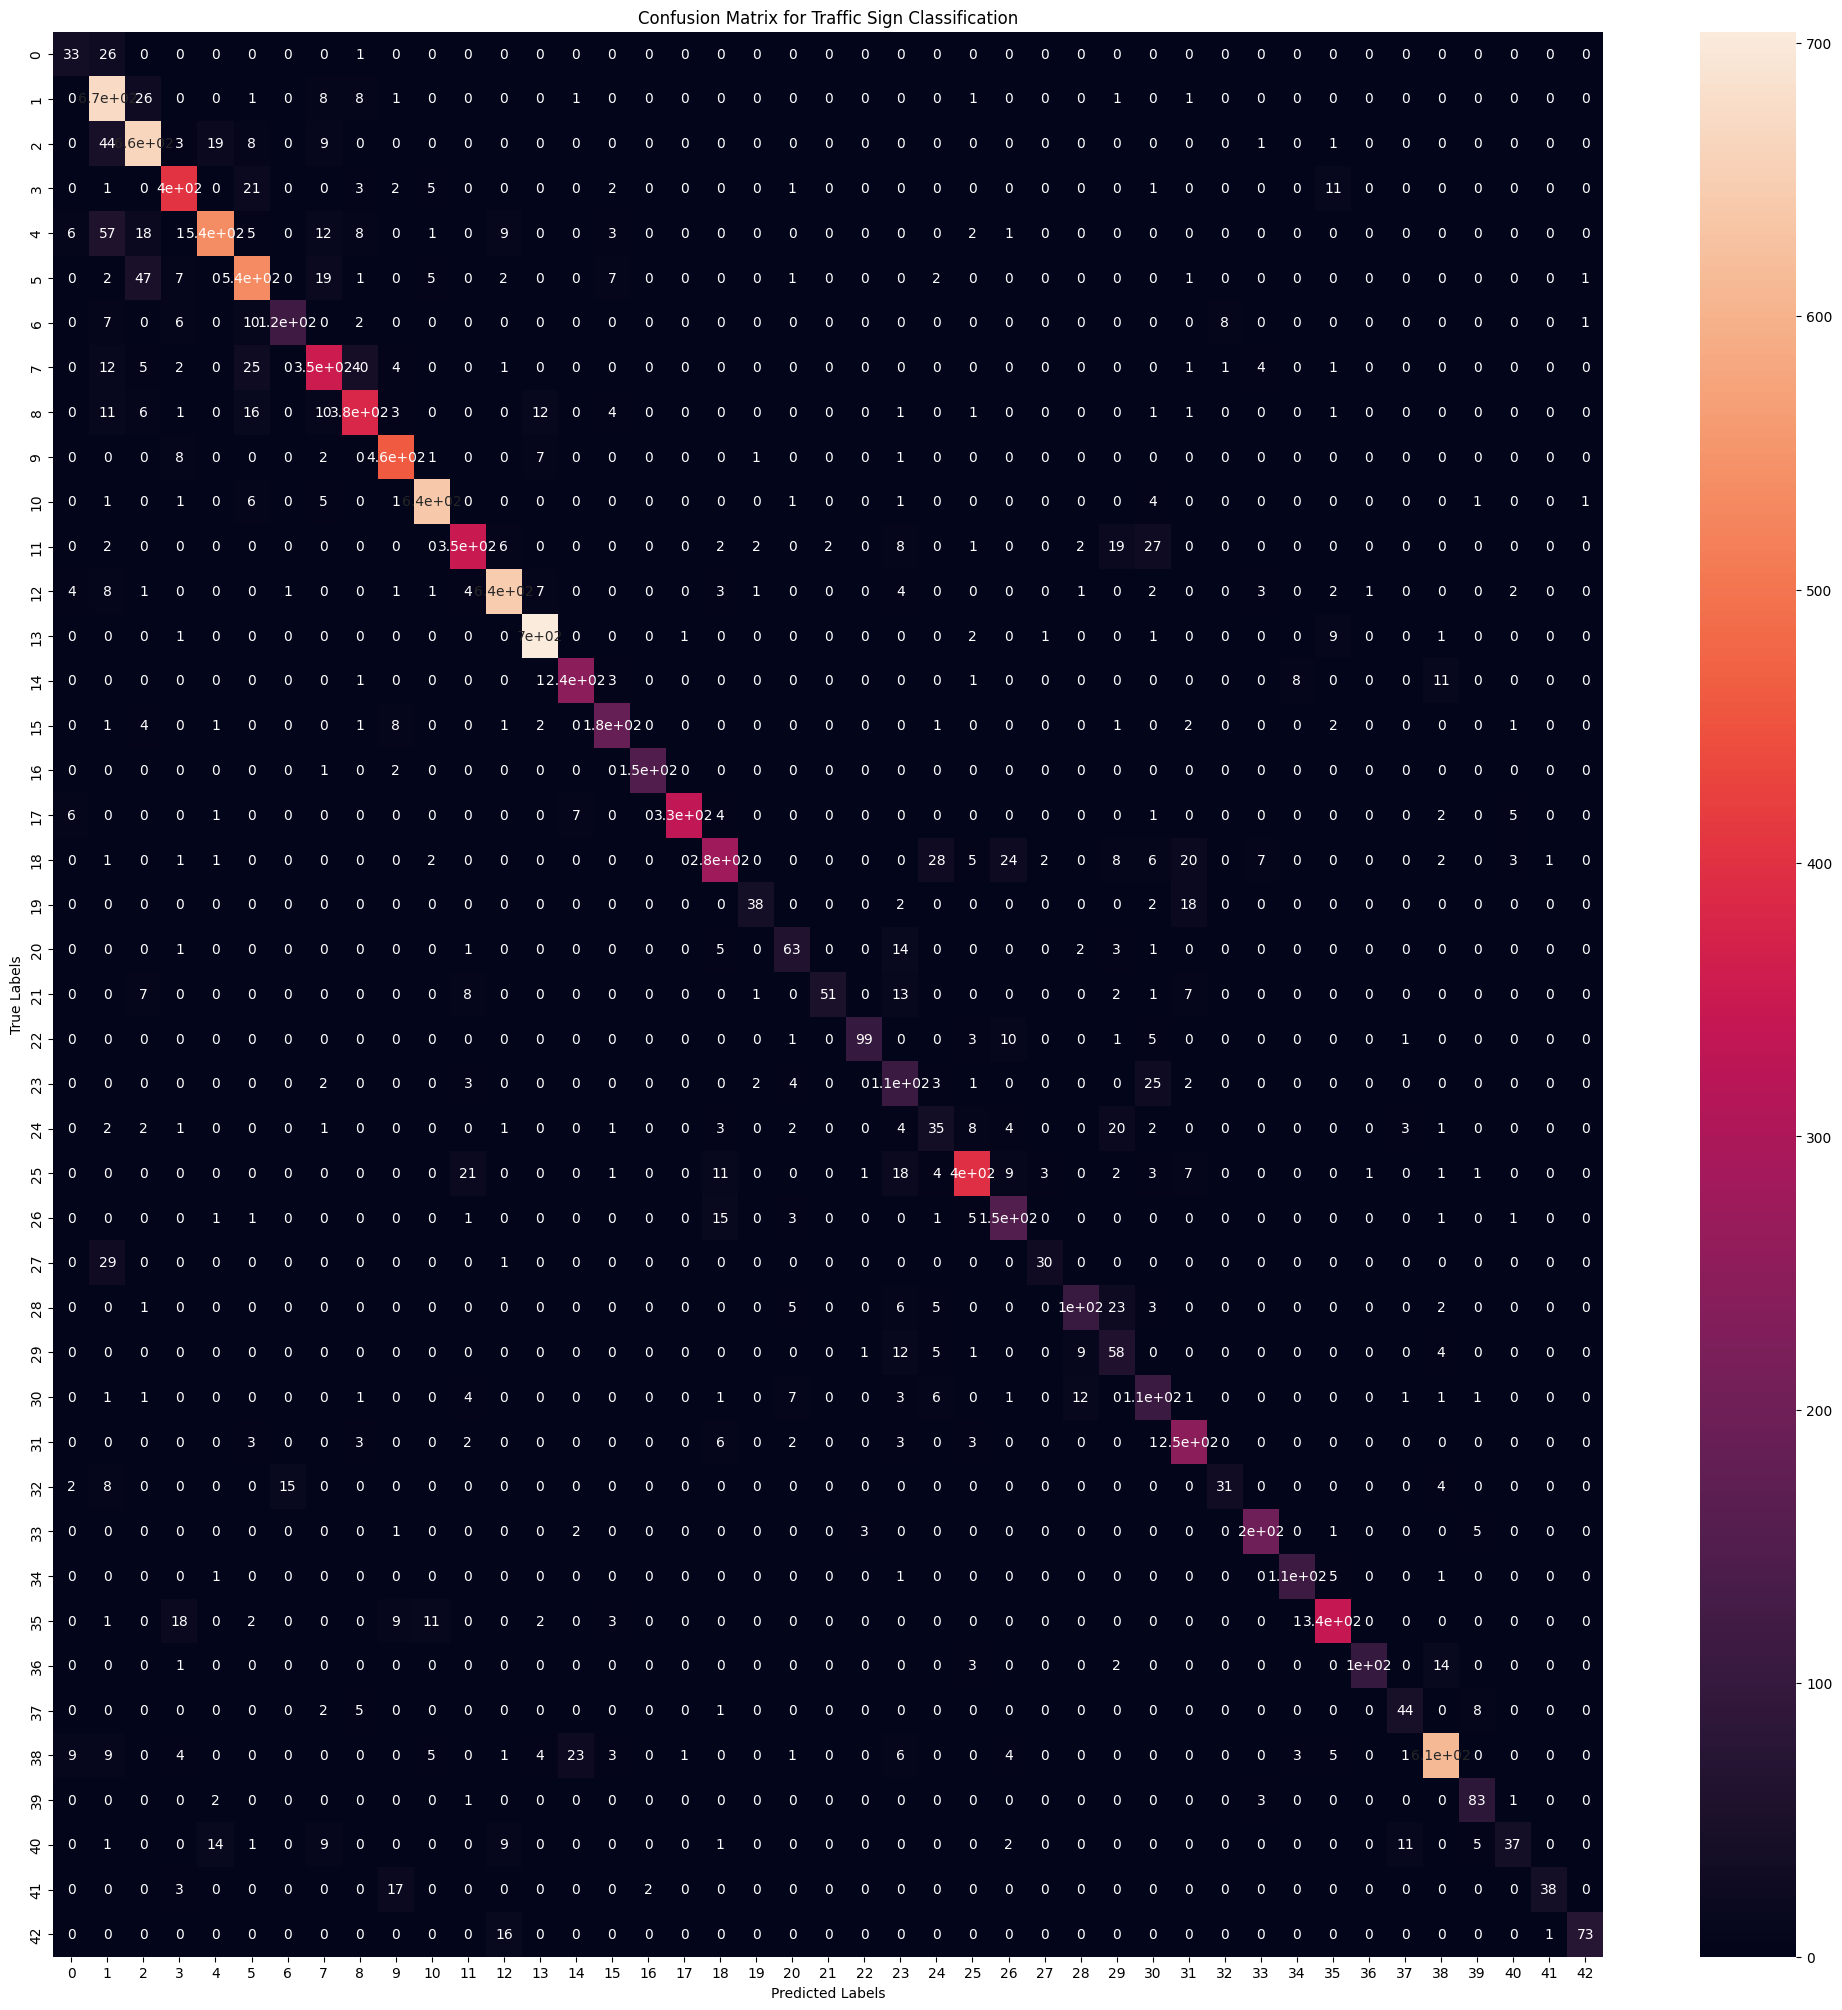

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Traffic Sign Classification')
plt.show()

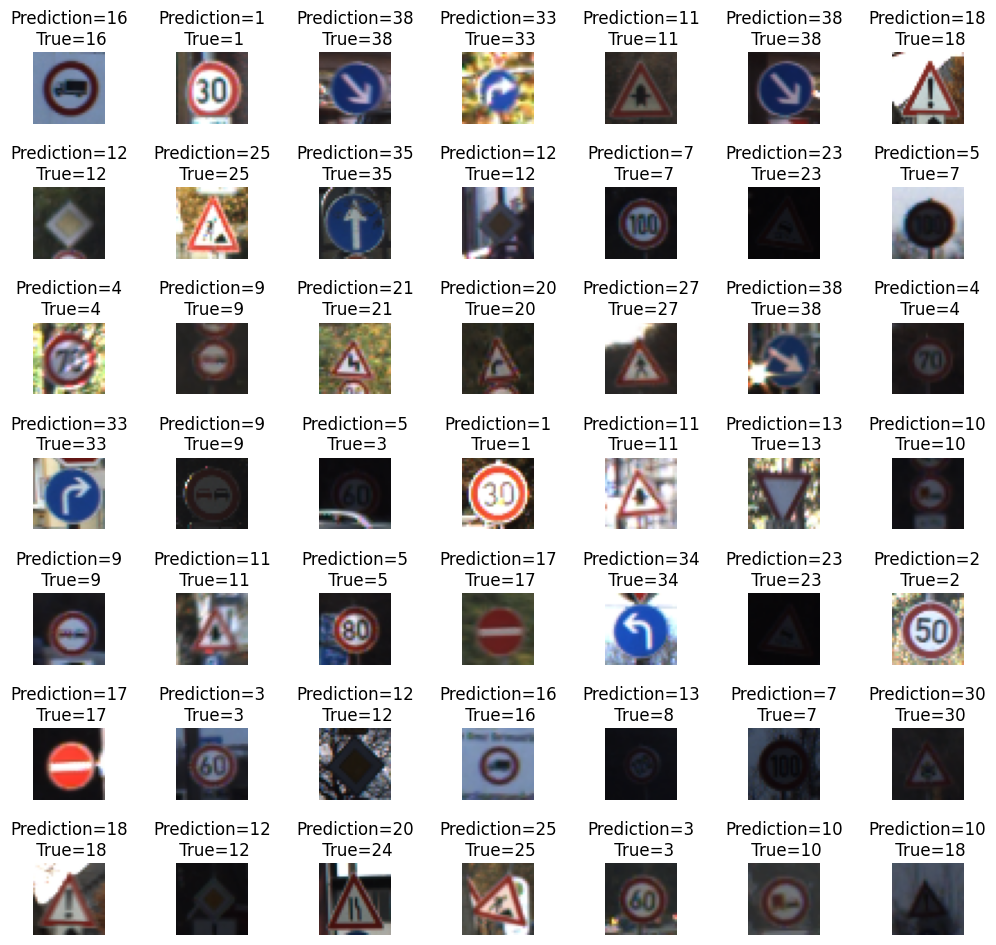

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# GREAT JOB! NOW WE'VE MASTERED CNNS TRAINING USING KERAS FOR AUTONOMOUS DRIVE CAR SYSTEMS!